In [1]:
from stdp_assemblies import *
import pars

print("Initializing")
params = pars.pars_overlap


Initializing


In [2]:
n_sims = 140
t_sim = 1_000_000
t_warmup = 10_000_000
t_total = n_sims * t_sim + t_warmup
rho = params["rho"]
w_max = params["w_max"]
a_size = params["assembly_size"]


network = hawkes_network(**params)
network.f0[10] = rho * (1 - 2 * (a_size - 1) * w_max) / (1 - (a_size - 1) * w_max)
network.set_f0()
w0 = np.copy(network.W)
matlist = []
matlist.append(w0)

print("Warmup network")
network.simulate(10_000_000, warmup=True)

print("Simulating network")
for i in tqdm(range(140)):
    network.simulate(1_000_000, tqdmsilence=True)
    matlist.append(np.copy(network.W))



Warmup network


  0%|          | 0/140 [00:00<?, ?it/s]

Simulating network


100%|██████████| 140/140 [26:53<00:00, 11.53s/it]


Note, that since overlap formation is spontaneous, the time of overlap formation will depend on the realization

Creating plots
Finished


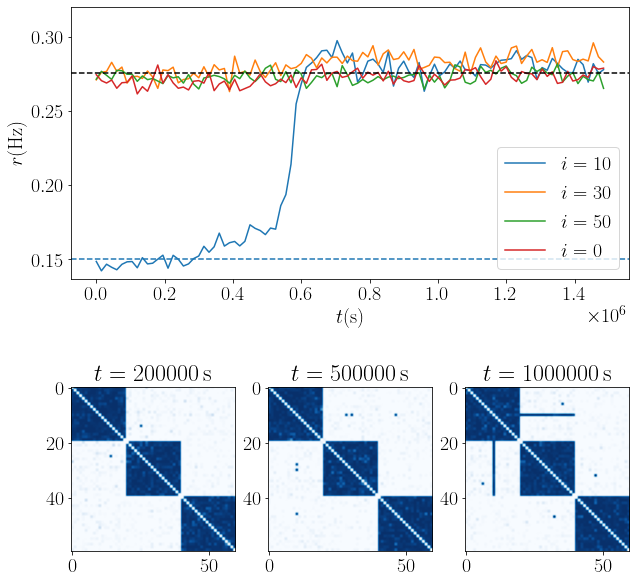

In [4]:
print("Creating plots")
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams["text.usetex"] = True
mpl.rcParams.update({"font.size": 20})

a_size = params["assembly_size"]
rho = params["rho"] * 100
rho_small = network.f0[10] * 100
w_max = params["w_max"]
expected_assembly_rate = rho / (1 - w_max * (a_size - 1))
# targ = rho_small + 2 * rho / (1 - (a_size - 1) * w_max) - 2 * rho
expected_small_assembly_rate = expected_assembly_rate - rho + rho_small

fig = plt.figure(figsize = (10,11))
axs = [plt.subplot(2,1,1),plt.subplot(2,3,4),plt.subplot(2,3,5),plt.subplot(2,3,6)]

#fig, ax = plt.subplots(figsize=(8, 7))
ts = t_total * np.arange(100) / 10000
axs[0].plot(
    ts,
    np.histogram(network.spikes[10], bins=100)[0] / t_total * 100 * 100,
    label="$i=10$",
) 
axs[0].plot(
    ts,
    np.histogram(network.spikes[30], bins=100)[0] / t_total * 100 * 100,
    label="$i=30$",
) 
axs[0].plot(
    ts,
    np.histogram(network.spikes[50], bins=100)[0] / t_total * 100 * 100,
    label="$i=50$",
) 
  
axs[0].plot(
    ts,
    np.histogram(network.spikes[0], bins=100)[0] / t_total * 100 * 100,
    label="$i= 0$",
) 
axs[0].axhline(expected_assembly_rate, linestyle="--", color="Black")
axs[0].axhline(expected_small_assembly_rate, color="tab:Blue", linestyle="--")
axs[0].set_xlabel("$t(\mathrm{s})$")
axs[0].set_ylabel("$r (\mathrm{Hz})$")
axs[0].set_ylim(0.137, 0.32)
axs[0].legend()


axs[1].imshow(matlist[10], cmap="Blues")
axs[2].imshow(matlist[40], cmap="Blues")
axs[3].imshow(matlist[90], cmap="Blues")
axs[1].set_title("$t=200000 \, \mathrm{s}$")
axs[2].set_title("$t=500000 \, \mathrm{s}$")
axs[3].set_title("$t=1000000 \, \mathrm{s}$")
fig.savefig("results/overlap/rates.png", dpi=500)

